**🔍 Project Summary: German Credit Risk Prediction Using Machine Learning**

Develingop a machine learning model to classify loan applicants as good or bad credit risks using the German Credit dataset. The project involves data exploration, cleaning, feature engineering, model development with classification algorithms, performance evaluation (accuracy, precision, recall, F1-score), and interpretation of key risk factors. Insights and visualizations help improve the credit evaluation processs.

In [1]:
#required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [457]:
df = pd.read_csv("german_credit_risk.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [458]:
df = df.drop('Unnamed: 0', axis='columns')
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


Some Data Exploration
VARIABLE DESCRIPTION
Meaning of the Values:

1. Age: Age of the person applying for the credit.
1. Sex: Gender of the person applying for the credit.
1. Job: 0,1,2,3 The values specified for the job in the form of 0,1,2,3.
1. Housing: own, rent or free.
1. Saving accounts: the amount of money in the person's bank account.
1. Checking account: cheque account.
1. Credit amount: Credit amount.
1. Duration: Time given for credit payment.
1. Purpose: Goal of credit application.
1. Risk: Credit application positive or negative.

In [459]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [460]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [461]:
len(df)

1000

Total 1000 rows. 183 savings account and 394 checking account have NULL values

In [462]:
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())

[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']


First, handling the savings accounts column

In [463]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [464]:
df['Savings_missing'] = df['Saving accounts'].isnull().astype(int)
df['Checking_missing'] = df['Checking account'].isnull().astype(int)

numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
savings_corr = df[numerical_cols].corrwith(df['Savings_missing'])
checking_corr = df[numerical_cols].corrwith(df['Checking_missing'])

print("Numerical Correlation with Savings Missing:\n", savings_corr)
print("\nNumerical Correlation with Checking Missing:\n", checking_corr)

Numerical Correlation with Savings Missing:
 Age              0.077811
Job              0.029960
Credit amount    0.106546
Duration         0.071185
dtype: float64

Numerical Correlation with Checking Missing:
 Age              0.062436
Job              0.052704
Credit amount   -0.039485
Duration        -0.063467
dtype: float64


In [465]:
categorical_cols = ['Sex', 'Housing', 'Purpose', 'Risk']

def compare_distributions(df, flag_col):
    for col in categorical_cols:
        print(f"\nCategorical Distribution by '{flag_col}' for '{col}':\n")
        return pd.crosstab(df[col], df[flag_col], normalize='columns')

compare_distributions(df, 'Savings_missing')


Categorical Distribution by 'Savings_missing' for 'Sex':



Savings_missing,0,1
Sex,,
female,0.319461,0.26776
male,0.680539,0.73224


In [466]:
compare_distributions(df, 'Checking_missing')


Categorical Distribution by 'Checking_missing' for 'Sex':



Checking_missing,0,1
Sex,,
female,0.320132,0.294416
male,0.679868,0.705584


In [467]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Savings_missing,Checking_missing
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0,0
2,49,male,1,own,little,NaN,2096,12,education,good,0,1


In [468]:
def group_mode_impute(df, target_col, group_cols):
    def get_mode(x):
        return x.mode()[0] if not x.mode().empty else 'no_info'
    return df[target_col].fillna(df.groupby(group_cols)[target_col].transform(get_mode))

df['Saving accounts'] = group_mode_impute(df, 'Saving accounts', ['Risk', 'Purpose'])
df['Checking account'] = group_mode_impute(df, 'Checking account', ['Risk', 'Purpose'])

# Step 5: Drop temporary flags
df.drop(columns=['Savings_missing', 'Checking_missing'], inplace=True)

# Confirm missing values handled
print("\nRemaining Missing Values:\n", df[['Saving accounts', 'Checking account']].isnull().sum())


Remaining Missing Values:
 Saving accounts     0
Checking account    0
dtype: int64


In [469]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


The missing values have been handled. There are no more missing values

DATA EXPLORATION

- First, we see the data distribution - basically check for class imbalance

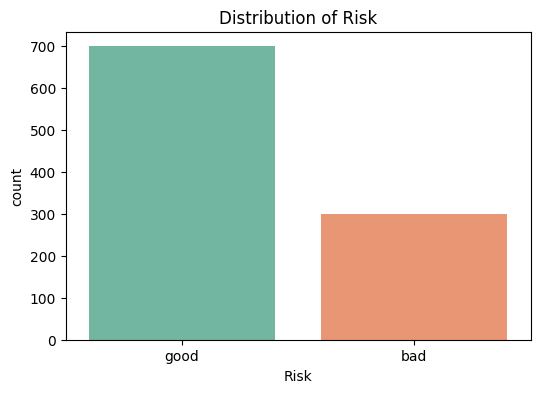

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Risk', palette='Set2')
plt.title('Distribution of Risk')
plt.show()

- Check how 'Risk' varies with key categories like Sex, Housing, Purpose

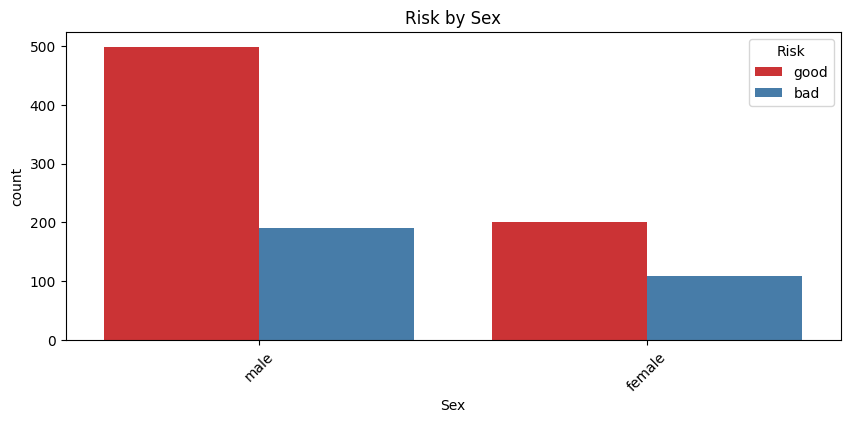

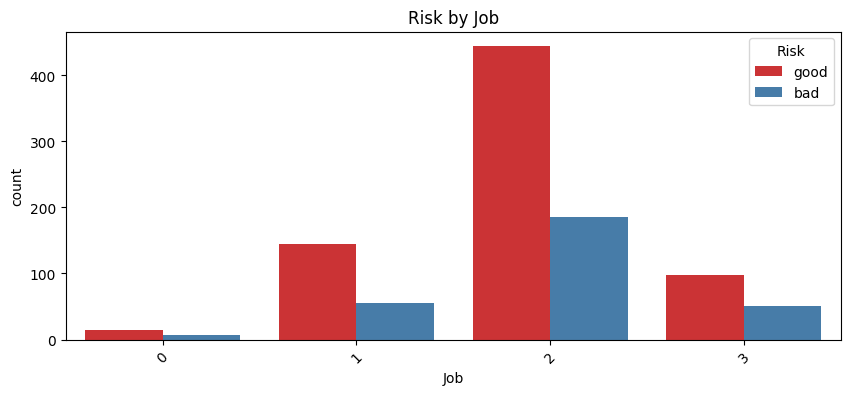

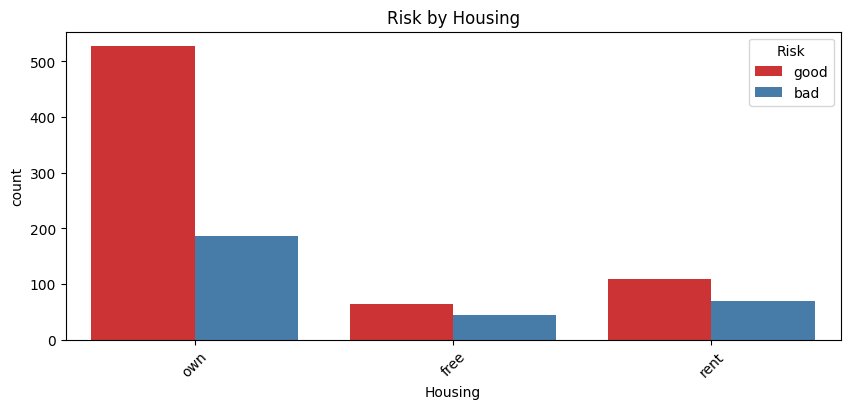

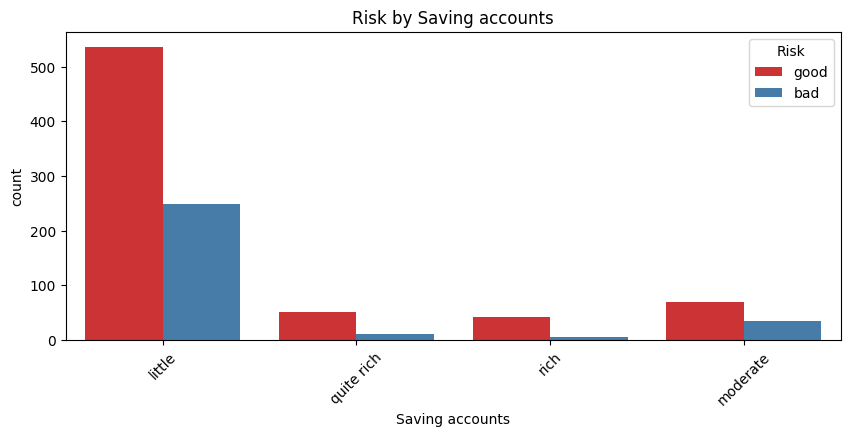

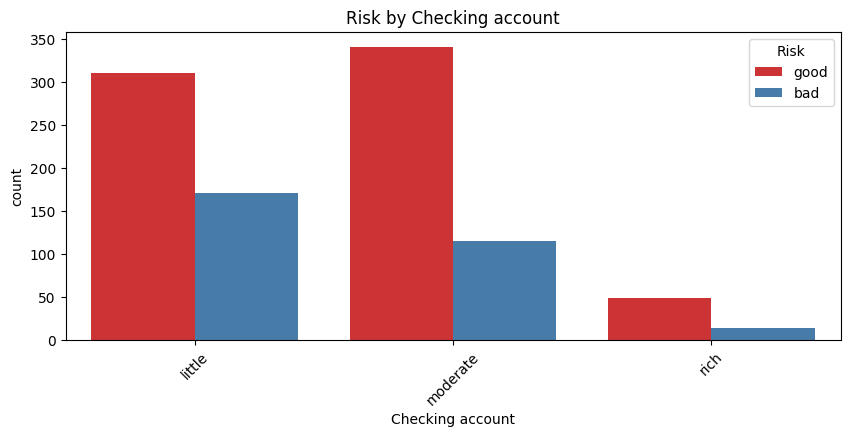

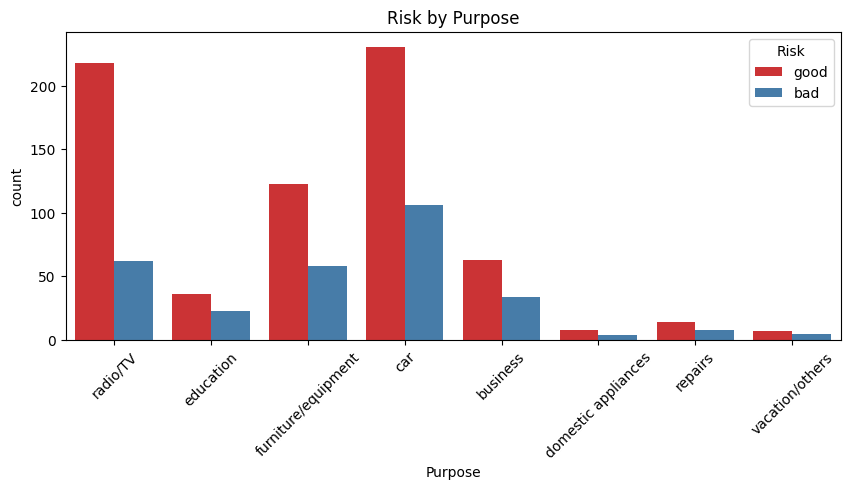

In [471]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, hue='Risk', palette='Set1')
    plt.title(f'Risk by {col}')
    plt.xticks(rotation=45)
    plt.show()

- understanding if risky applicants have different patterns

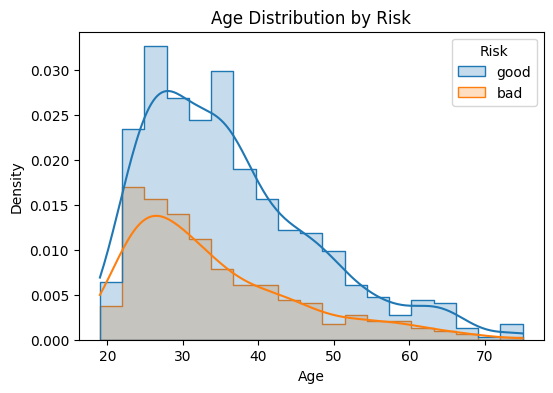

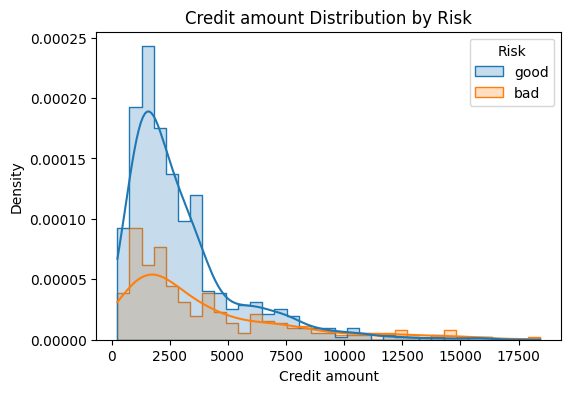

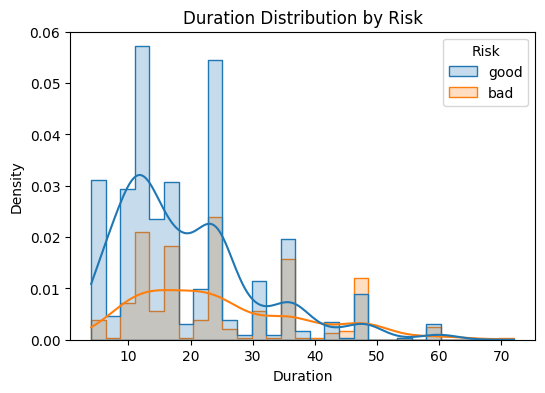

In [472]:
numerical_cols = ['Age', 'Credit amount', 'Duration']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Risk', kde=True, element='step', stat='density')
    plt.title(f'{col} Distribution by Risk')
    plt.show()


# Now the oulier detection

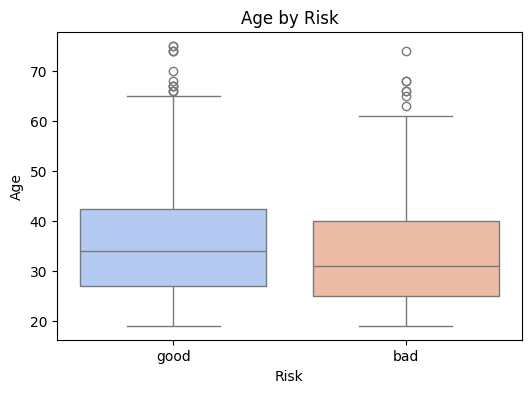

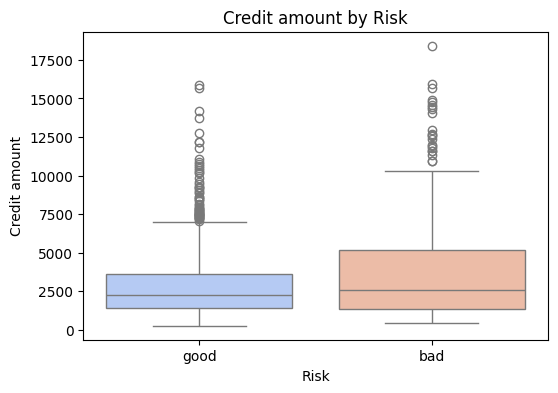

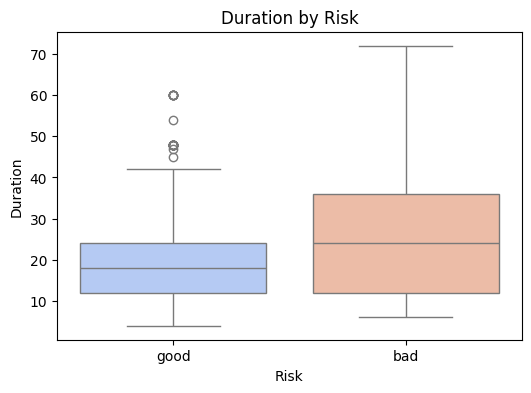

In [473]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Risk', y=col, palette='coolwarm')
    plt.title(f'{col} by Risk')
    plt.show()

- Heatmap of Numerical Correlation

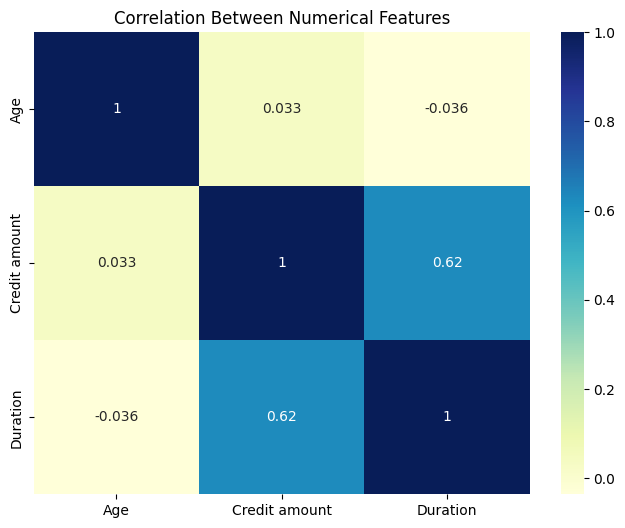

In [474]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Numerical Features')
plt.show()

# Conclusions from here:
- Longer duration → more risk
- Higher credit → slightly more risk
- Housing=own and Purpose=radio/TV → lower risk
- Male has slightly higher representation among risky profiles

# PART 1: CATEGORICAL DEPENDENCY — Cramér’s V
Cramér’s V gives the strength of association between two categorical variables (values between 0 = no association, 1 = strong association).

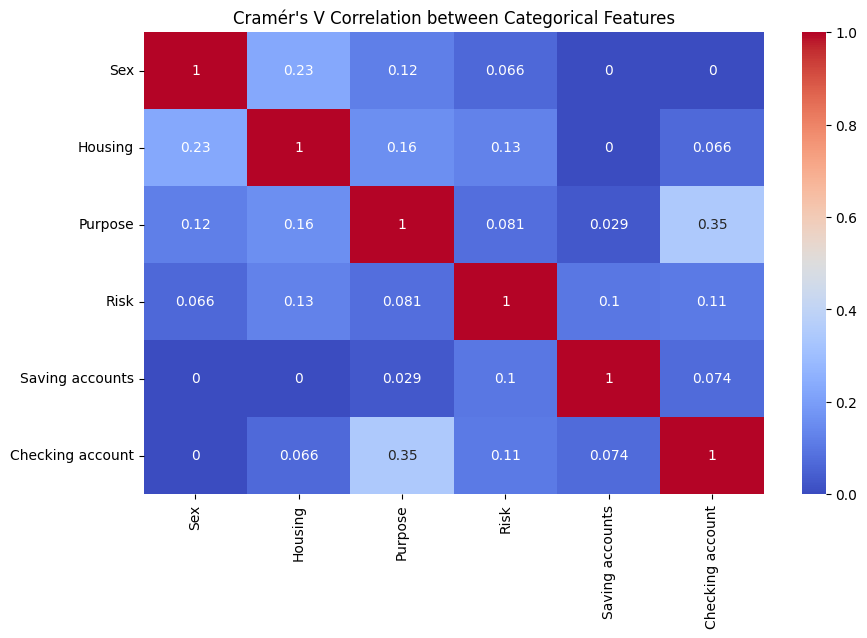

In [475]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def compute_cramers_v_matrix(df, cols):
    result = pd.DataFrame(index=cols, columns=cols)
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                result.loc[col1, col2] = 1.0
            else:
                matrix = pd.crosstab(df[col1], df[col2])
                result.loc[col1, col2] = cramers_v(matrix)
    return result.astype(float)

categorical_cols = ['Sex', 'Housing', 'Purpose', 'Risk', 'Saving accounts', 'Checking account']
cramers_v_matrix = compute_cramers_v_matrix(df, categorical_cols)

plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')
plt.title("Cramér's V Correlation between Categorical Features")
plt.show()


# PART 2: TARGET LEAKAGE CHECK
Since we are predicting Risk, so we want to check how strongly other columns "predict" the target, especially suspiciously strong ones.

In [476]:
# Numerical correlation with Risk (if Risk is binary 0/1)
df['Risk_encoded'] = df['Risk'].map({'good': 0, 'bad': 1})  # Adjust based on your data

# For numerical features
print("\nNumerical features correlation with Risk:")
print(df.select_dtypes(include='number').corr()['Risk_encoded'].sort_values(ascending=False))


Numerical features correlation with Risk:
Risk_encoded     1.000000
Duration         0.214927
Credit amount    0.154739
Job              0.032735
Age             -0.091127
Name: Risk_encoded, dtype: float64


In [477]:
# For categorical features: Check distributions
for col in categorical_cols:
    if col != 'Risk':
        display(pd.crosstab(df[col], df['Risk'], normalize='index'))

Risk,bad,good
Sex,,
female,0.351613,0.648387
male,0.276812,0.723188


Risk,bad,good
Housing,,
free,0.407407,0.592593
own,0.260870,0.739130
rent,0.391061,0.608939


Risk,bad,good
Purpose,,
business,0.350515,0.649485
car,0.314540,0.685460
domestic appliances,0.333333,0.666667
education,0.389831,0.610169
furniture/equipment,0.320442,0.679558
radio/TV,0.221429,0.778571
repairs,0.363636,0.636364
vacation/others,0.416667,0.583333


Risk,bad,good
Saving accounts,,
little,0.316794,0.683206
moderate,0.330097,0.669903
quite rich,0.174603,0.825397
rich,0.125000,0.875000


Risk,bad,good
Checking account,,
little,0.355509,0.644491
moderate,0.252193,0.747807
rich,0.222222,0.777778


$ Conclusions $

Purpose vs Checking account = 0.35 ->  Moderate correlation – maybe people with certain account status apply for specific loan purposes

Sex vs Housing = 0.23 -> Weak-moderate – women may slightly differ in housing situations

All others = < 0.2 -> Weak or no significant dependency, no redundancy detected

Also, No clear signs of leakage here. The correlations are reasonable.

In [478]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Risk_encoded
0,67,male,2,own,little,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,moderate,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [479]:
for keys in df.keys():
    if keys in ['Age', 'Credit amount', 'Duration']:
        print(f'{keys}: This is completely Numerical column')
    else:
        print(f'Column => {keys}: {df[keys].unique()}')

Age: This is completely Numerical column
Column => Sex: ['male' 'female']
Column => Job: [2 1 3 0]
Column => Housing: ['own' 'free' 'rent']
Column => Saving accounts: ['little' 'quite rich' 'rich' 'moderate']
Column => Checking account: ['little' 'moderate' 'rich']
Credit amount: This is completely Numerical column
Duration: This is completely Numerical column
Column => Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Column => Risk: ['good' 'bad']
Column => Risk_encoded: [0 1]


# Now we start the preprocessing

In [480]:
columns_to_be_encoded = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for cols in columns_to_be_encoded:
    df[f'encoded_{cols}'] = encoder.fit_transform(df[cols])

print("The whole dataframe has been encoded")
df.head()

The whole dataframe has been encoded


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Risk_encoded,encoded_Sex,encoded_Housing,encoded_Saving accounts,encoded_Checking account,encoded_Purpose
0,67,male,2,own,little,little,1169,6,radio/TV,good,0,1,1,0,0,5
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0,1,0,1,5
2,49,male,1,own,little,moderate,2096,12,education,good,0,1,1,0,1,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,1,0,0,0,4
4,53,male,2,free,little,little,4870,24,car,bad,1,1,0,0,0,1


In [481]:
df = df.drop(columns_to_be_encoded, axis='columns')
df = df.drop('Risk', axis='columns')
df.head()

,Age,Job,Credit amount,Duration,Risk_encoded,encoded_Sex,encoded_Housing,encoded_Saving accounts,encoded_Checking account,encoded_Purpose
0,67,2,1169,6,0,1,1,0,0,5
1,22,2,5951,48,1,0,1,0,1,5
2,49,1,2096,12,0,1,1,0,1,3
3,45,2,7882,42,0,1,0,0,0,4
4,53,2,4870,24,1,1,0,0,0,1


In [482]:
X = df.drop('Risk_encoded', axis = 'columns')
y = df['Risk_encoded']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)
print(len(X_train), len(X_test))

800 200


# Hyper-parameter tuning

Targeted models:
1) Random Forest
2) Decision Tree
3) SVM

In [483]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

results = {}

# The Random Forest params
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, scoring='f1')
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)
results['Random Forest'] = {
    'model': rf_best,
    'accuracy': accuracy_score(y_test, rf_preds),
    'f1_score': rf_grid.best_score_,
    'report': classification_report(y_test, rf_preds),
    'confusion_matrix': confusion_matrix(y_test, rf_preds)
}

In [484]:
# Decision Tree params
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1, scoring='f1')
dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(X_test)
results['Decision Tree'] = {
    'model': dt_best,
    'accuracy': accuracy_score(y_test, dt_preds),
    'f1_score': dt_grid.best_score_,
    'report': classification_report(y_test, dt_preds),
    'confusion_matrix': confusion_matrix(y_test, dt_preds)
}

In [487]:
# Logistic Regression params
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, n_jobs=-1, scoring='f1')
lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
lr_preds = lr_best.predict(X_test)
results['Logistic Regression'] = {
    'model': lr_best,
    'accuracy': accuracy_score(y_test, lr_preds),
    'f1_score': lr_grid.best_score_,
    'report': classification_report(y_test, lr_preds),
    'confusion_matrix': confusion_matrix(y_test, lr_preds)
}

In [488]:
for name, res in results.items():
    print(f"\n{'='*40}\n{name}")
    print(f"Best Estimator: {res['model']}")
    print(f"Test Accuracy: {res['accuracy']:.4f}")
    print(f"Cross-validated F1-score: {res['f1_score']:.4f}")
    print("Classification Report:\n", res['report'])
    print("Confusion Matrix:\n", res['confusion_matrix'])


Random Forest
Best Estimator: RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
Test Accuracy: 0.7100
Cross-validated F1-score: 0.3193
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       127
           1       0.80      0.27      0.41        73

    accuracy                           0.71       200
   macro avg       0.75      0.62      0.61       200
weighted avg       0.73      0.71      0.66       200

Confusion Matrix:
 [[122   5]
 [ 53  20]]

Decision Tree
Best Estimator: DecisionTreeClassifier(random_state=42)
Test Accuracy: 0.6000
Cross-validated F1-score: 0.3760
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       127
           1       0.44      0.34      0.38        73

    accuracy                           0.60       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.58    

$ Conclusions-from-here $ 

- As there is class imbalance - more 0 and less 1 hence recall everytime is far better for class 0. 
- Therefore, the model is biased
- F1-score on class 1 is poor across all models
- High false negatives for risky cases — not good in real-life credit scoring!



# We'll use SMOTE for resampling - it will handle the class imbalance

In [489]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_train_res).value_counts())

After SMOTE: Risk_encoded
1    573
0    573
Name: count, dtype: int64


# New hyper parameter tuning

In [ ]:
results = {}

# 1. Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'), 
    rf_params, cv=5, n_jobs=-1, scoring='f1'
)
rf_grid.fit(X_train_res, y_train_res)

rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)
results['Random Forest'] = {
    'model': rf_best,
    'accuracy': accuracy_score(y_test, rf_preds),
    'f1_score': rf_grid.best_score_,
    'report': classification_report(y_test, rf_preds),
    'confusion_matrix': confusion_matrix(y_test, rf_preds)
}


# 2. Decision Tree
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'), 
    dt_params, cv=5, n_jobs=-1, scoring='f1'
)
dt_grid.fit(X_train_res, y_train_res)

dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(X_test)
results['Decision Tree'] = {
    'model': dt_best,
    'accuracy': accuracy_score(y_test, dt_preds),
    'f1_score': dt_grid.best_score_,
    'report': classification_report(y_test, dt_preds),
    'confusion_matrix': confusion_matrix(y_test, dt_preds)
}

# 4. Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
}
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), 
    lr_params, cv=5, n_jobs=-1, scoring='f1'
)
lr_grid.fit(X_train_res, y_train_res)

lr_best = lr_grid.best_estimator_
lr_preds = lr_best.predict(X_test)
results['Logistic Regression'] = {
    'model': lr_best,
    'accuracy': accuracy_score(y_test, lr_preds),
    'f1_score': lr_grid.best_score_,
    'report': classification_report(y_test, lr_preds),
    'confusion_matrix': confusion_matrix(y_test, lr_preds)
}


for name, res in results.items():
    print(f"\n{'='*40}\n{name}")
    print(f"Best Estimator: {res['model']}")
    print(f"Test Accuracy: {res['accuracy']:.4f}")
    print(f"Cross-validated F1-score: {res['f1_score']:.4f}")
    print("Classification Report:\n", res['report'])
    print("Confusion Matrix:\n", res['confusion_matrix'])


Random Forest
Best Estimator: RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)
Test Accuracy: 0.6550
Cross-validated F1-score: 0.7683
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       127
           1       0.53      0.51      0.52        73

    accuracy                           0.66       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.65      0.66      0.65       200

Confusion Matrix:
 [[94 33]
 [36 37]]

Decision Tree
Best Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)
Test Accuracy: 0.6500
Cross-validated F1-score: 0.7215
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72       127
           1       0.52      0.58      0.55        73

    accu

# Imbalance handled. But accuracy is still low

Introducing XgBoost and LightGBM

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Optional: create dictionary to store boosting results
boosting_results = {}


xgb = XGBClassifier(learning_rate = 0.05, max_depth = 5, n_estimators=100, subsample=0.8, use_label_encoder=False, eval_metric='logloss')

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb_grid = GridSearchCV(
    xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1
)
xgb_grid.fit(X_train_res, y_train_res)

xgb_best = xgb_grid.best_estimator_
xgb_preds = xgb_best.predict(X_test)
boosting_results['XGBoost'] = {
    'model': xgb_best,
    'accuracy': accuracy_score(y_test, xgb_preds),
    'f1_score': xgb_grid.best_score_,
    'report': classification_report(y_test, xgb_preds),
    'confusion_matrix': confusion_matrix(y_test, xgb_preds)
}


lgb = LGBMClassifier(random_state=42)

lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, -1],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgb_grid = GridSearchCV(
    lgb, lgb_params, cv=5, scoring='f1', n_jobs=-1
)
lgb_grid.fit(X_train_res, y_train_res)

lgb_best = lgb_grid.best_estimator_
lgb_preds = lgb_best.predict(X_test)
boosting_results['LightGBM'] = {
    'model': lgb_best,
    'accuracy': accuracy_score(y_test, lgb_preds),
    'f1_score': lgb_grid.best_score_,
    'report': classification_report(y_test, lgb_preds),
    'confusion_matrix': confusion_matrix(y_test, lgb_preds)
}


# 🔍 Show results
for name, res in boosting_results.items():
    print(f"\n{'='*40}\n{name}")
    print(f"Best Estimator: {res['model']}")
    print(f"Test Accuracy: {res['accuracy']:.4f}")
    print(f"Cross-validated F1-score: {res['f1_score']:.4f}")
    print("Classification Report:\n", res['report'])
    print("Confusion Matrix:\n", res['confusion_matrix'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 573, number of negative: 573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

XGBoost
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
  

# Accuracy has improved

- Fewer false negatives
- Model somewhat is predicting properly for risk data points

# Next thing?

- We use combination of models.


In [492]:
best_estimators = {
    'Random Forest': rf_grid.best_estimator_,
    'Decision Tree': dt_grid.best_estimator_,
    'Logistic Regression': lr_grid.best_estimator_,
}

# Introduction of Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('rf', best_estimators['Random Forest']),
        ('logreg', best_estimators['Logistic Regression']),
    ],
    voting='soft'  
)
ensemble.fit(X_train_res, y_train_res)
ensemble_preds = ensemble.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print("Classification Report:\n", classification_report(y_test, ensemble_preds))

Ensemble Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       127
           1       0.57      0.48      0.52        73

    accuracy                           0.68       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.67      0.68      0.67       200



In [494]:
# ratio of negative / positive in original y_train
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_weighted = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)
xgb_weighted.fit(X_train_res, y_train_res)
y_pred_weighted = xgb_weighted.predict(X_test)

print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       127
           1       0.49      0.49      0.49        73

    accuracy                           0.63       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.63      0.63      0.63       200



In [495]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, 2])
cat.fit(X_train_res, y_train_res)
y_pred_cat = cat.predict(X_test)

print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       127
           1       0.50      0.71      0.59        73

    accuracy                           0.64       200
   macro avg       0.64      0.65      0.63       200
weighted avg       0.68      0.64      0.64       200



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_res)
X_test_poly = poly.transform(X_test)

new_ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('rf', best_estimators['Random Forest']),
        ('logreg', best_estimators['Logistic Regression']),
    ],
    voting='soft'  
)
new_ensemble.fit(X_train_poly, y_train_res)
new_ensemble_preds = new_ensemble.predict(X_test_poly)

print("Ensemble Accuracy:", accuracy_score(y_test, new_ensemble_preds))
print("Classification Report:\n", classification_report(y_test, new_ensemble_preds))

Ensemble Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       127
           1       0.55      0.56      0.56        73

    accuracy                           0.68       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.68      0.68      0.68       200



# Final Accuracy scores of the best models:
- Random Forest: 71%
- Logistic Regression: 70% 
- VotingClassifier: 68% (both normal and after introducing polynomial features)

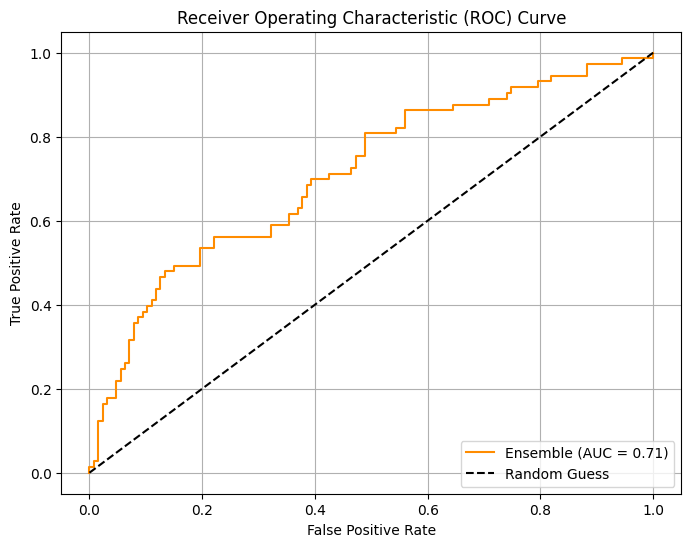

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (label 1)
y_proba = new_ensemble.predict_proba(X_test_poly)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

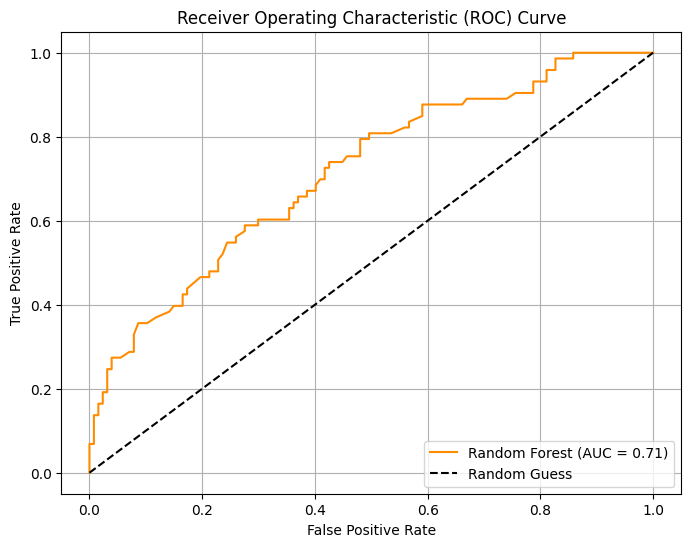

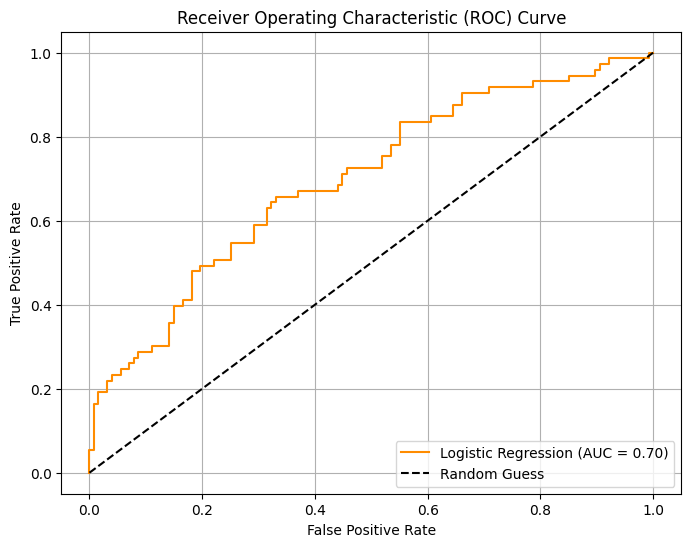

In [ ]:
random_forest = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
logistic = LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,random_state=42)

random_forest.fit(X_train, y_train)

y_proba = random_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

logistic.fit(X_train, y_train)

y_proba = logistic.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()